[Home](../../README.md)

### Model Evaluation

I have chosen a **polynominal regression** approach after evaluating the model through:

* Linear regression: 0.30
* Multiple variable linear regression: 0.50
* Polynominal regression: 0.64

We will also be calcluating the cost and loss, which can allow for comparisions and optimisation parameters. Additionally, we will evaluate x-axis intercept and coefficient values to directly indicate which features have the strongest influence on bike demand, helping prioritize which factors to focus on in business decisions. Additionally, tracking this after deployment can also identify seasonal patterns or degradation in model performance that may require retraining

### Linear regression

#### Step 1

Load the required dependencies.


In [1]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('../../style_Matplotlib_charts.mplstyle')
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pickle

####  Step 2

Load the model for testing

In [2]:
filename = 'my_saved_model_v1.sav'
model_A = pickle.load(open(filename, 'rb'))


####  Step 3
Open and parse the test data CSV file and store the data as variable array data objects.

In [3]:
x_col = 'Temp'
testing_data = pd.read_csv('2.4.1.testing_data.csv')
x_test = np.array(testing_data[x_col]).reshape(-1,1)
y_test = np.array(testing_data['Count'])

* `reshape(-1,1)` is required as scikit-learn only allows 2D arrays

* Using temperature (`x_col`) to predict bike count (`y_test`)

#### Step 5

Plot the test data features, targets and linear regression model to visually evaluate the model.

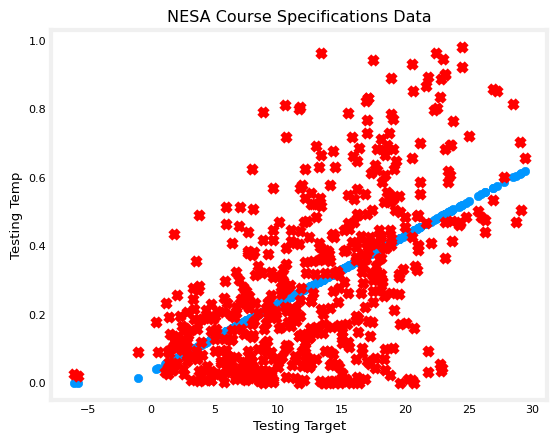

In [4]:
y_pred = model_A.predict(x_test)
y_pred = np.maximum(0, y_pred)

plt.scatter(x_test, y_pred)
plt.scatter(x_test, y_test, marker='x', c='r')
plt.title("NESA Course Specifications Data")
plt.ylabel(f'Testing {x_col}')
plt.xlabel(f'Testing Target')
plt.show()

#### Step 6

Use the 'score' method of the `LinearRegression` class to return a score based evaluation of the models accuracy or performance.

In [5]:
test_score = model_A.score(x_test, y_test)
print(f'Training data score: {test_score}')

Training data score: 0.3051837087060081


#### Step 7

Manually calculate and evaluate the 'loss' and 'cost' of the model using the test data.

* We will again multiply values, this time `* 1000`

In [18]:
table = pd.DataFrame({
    testing_data.columns[0]: x_test.flatten(),  # Flatten x for easy display
    testing_data.columns[1]: y_test * 1000,
    'Predicted result':model_A.predict(x_test) * 1000,
    'Loss' : y_test - model_A.predict(x_test).round(2) * 1000
})
print(table)
cost = table['Loss'].sum() / table.shape[0]
print(f"The cost or average loss of this model is {cost}")

     Date       Count  Predicted result        Loss
0     1.7   45.000000          4.728975    0.045000
1    16.1  182.083333        362.042851 -359.817917
2     2.7  158.750000         29.542438  -29.841250
3    15.6  103.333333        349.636119 -349.896667
4     4.7  230.416667         79.169365  -79.769583
..    ...         ...               ...         ...
539   5.5   25.833333         99.020136  -99.974167
540  12.1  624.166667        262.788996 -259.375833
541   6.7  220.833333        128.796293 -129.779167
542  15.3  386.666667        342.192080 -339.613333
543  10.9  284.166667        233.012840 -229.715833

[544 rows x 4 columns]
The cost or average loss of this model is -271.69696614583336


* Predictions were seemingly low. However, this is possibly due to the model being trained on normalised targets.

* Performes worse with smaller temperatures

* Average loss of -270 is very innacurate

In [7]:
print("Max bike count in training:", testing_data['Count'].max())

Max bike count in training: 0.98125


Here are manual predictions to understand count prediction.

In [20]:
print(model_A.predict([[20]]))
print(model_A.predict([[10]]))

[0.45881536]
[0.21068072]


#### Step 8

Evaluate the X axis intercept and gradient or coefficient of your model by using the getter methods to return the intercept and coefficient from my_model() object.

In [12]:
print(f'X Axis intercept: {model_A.intercept_}')
print(f'Coefficient: {model_A.coef_}')

X Axis intercept: -0.03745391353233407
Coefficient: [0.02481346]


### Multiple Variable Linear Regression

In [2]:
filename = 'my_saved_model_v2.sav'
model_C = pickle.load(open(filename, 'rb'))

In [3]:
testing_data = pd.read_csv('2.4.1.testing_data.csv')
mx_col = ['ComfortIndexScaled','HourDPT%','Temp','DewPointTemp','WindSpeed','Rainfall','RushHour']

mx_test = np.array(testing_data[mx_col])
my_test = np.array(testing_data['Count'])

* I have **seven** features, with some which I combined reused due to standalone effectiveness

* Other features such as snowfall and radiation were not used due to lack of variance in data, therefore hindering prediction

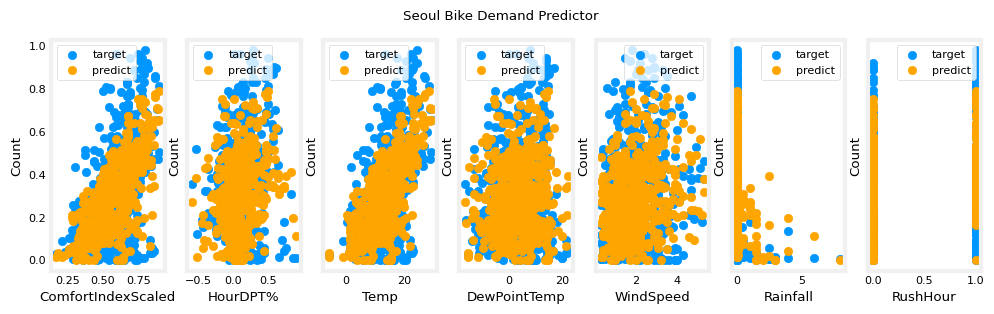

In [23]:
my_pred = model_C.predict(mx_test)
my_pred = np.maximum(0, my_pred)

# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,len(mx_col),figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(mx_test[:,i],my_test, label = 'target')
    ax[i].set_xlabel(mx_col[i])
    ax[i].scatter(mx_test[:,i],my_pred,color="orange", label = 'predict')
    ax[i].set_ylabel("Count"); ax[i].legend();
fig.suptitle("Seoul Bike Demand Predictor")
plt.show()

In [6]:
test_score = model_C.score(mx_test, my_test)
print(f'Training data score: {test_score}')

Training data score: 0.5767294443391298


* Score is much higher than previously, however still stops at 0.8

In [25]:
print(model_C.predict([[0.5,0.1,15,3,0.1,0.1,0.5]]))

[0.46872689]


In [5]:
data = {col: mx_test[:, i] for i, col in enumerate(mx_col)}
data['Target'] = my_test * 1000
data['Predicted result'] = model_C.predict(mx_test) * 1000
data['Cost'] = my_test - model_C.predict(mx_test).round(2) * 1000

table = pd.DataFrame(data)
print(table)
cost = table['Cost'].sum() / table.shape[0]
print(f"The cost or average loss of this model is {cost}")

     ComfortIndexScaled  HourDPT%  Temp  DewPointTemp  WindSpeed  Rainfall  \
0                  0.32     -0.07   1.7          -5.6        3.8       0.0   
1                  0.65      0.04  16.1          10.6        0.6       0.0   
2                  0.32     -0.04   2.7          -2.0        1.3       0.0   
3                  0.63      0.09  15.6          10.5        0.5       0.0   
4                  0.44     -0.30   4.7         -13.2        4.8       0.0   
..                  ...       ...   ...           ...        ...       ...   
539                0.35      0.03   5.5           4.9        1.6       0.0   
540                0.57     -0.12  12.1          -2.9        2.4       0.0   
541                0.47     -0.36   6.7          -8.8        1.9       0.0   
542                0.63      0.15  15.3           6.0        2.1       0.0   
543                0.54     -0.10  10.9          -3.6        2.1       0.0   

     RushHour      Target  Predicted result        Cost  
0    

* 

In [137]:
print(f'X Axis intercept: {model_C.intercept_}')
print(f'Coefficient: {model_C.coef_}')

X Axis intercept: 0.09831426221502476
Coefficient: [-0.58541793  0.36543213  0.04113423 -0.02072979  0.00792964 -0.0468101
  0.15128481]


* The positive intercept (0.0983) represents the baseline bike demand when all predictors are zero, suggesting a minimal baseline usage regardless of conditions

* ComfortIndexScaled has the strongest negative influence on bike demand (coefficient ≈ -0.5854), suggesting that as the measured comfort index increases, fewer people choose to use bikes

* HourDPT% shows a strong positive relationship (coefficient ≈ 0.3654), indicating that higher humidity levels may actually encourage bike usage in this context

### Polynominal Regression

In [33]:
filename = 'my_saved_model_v3.sav'
model_E = pickle.load(open(filename, 'rb'))

In [34]:
testing_data = pd.read_csv('2.4.1.testing_data.csv')
mx_col = ['ComfortIndexScaled','HourDPT%','Temp','DewPointTemp','WindSpeed','Rainfall','RushHour']

mx_test = np.array(testing_data[mx_col])
my_test = np.array(testing_data['Count'])

* (Features are the same as before)

In [35]:
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(mx_test)

# Create the model
my_model = LinearRegression()

# Fit the model to the data
my_model.fit(poly_features, my_test)

LinearRegression()

* The LinearRegression model already includes an intercept term by default, so `include_bias=False`

* Polynominal features above 3 degrees led to overfitting, evident through negative training data scores

    * This degree results in good generalisation

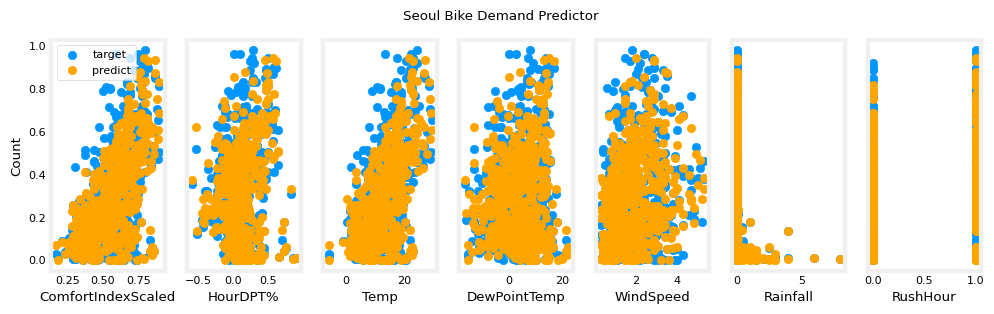

In [36]:
my_pred = my_model.predict(poly_features)
my_pred = np.maximum(0, my_pred)

if len(mx_col) == 1:
    plt.scatter(mx_test, my_pred)
    plt.scatter(mx_test, my_test, marker='x', c='r')
    plt.title("Seoul Bike Demand Predictor")
    plt.ylabel("Count")
    plt.xlabel(mx_col[0])
else:
    fig, ax = plt.subplots(1, len(mx_col), figsize=(12, 3), sharey=True)
    for i in range(len(ax)):
        ax[i].scatter(mx_test[:, i], my_test, label='target')
        ax[i].set_xlabel(mx_col[i])
        ax[i].scatter(mx_test[:, i], my_pred, color="orange", label='predict')
    ax[0].set_ylabel("Count")
    ax[0].legend()
    fig.suptitle("Seoul Bike Demand Predictor")
plt.show()

In [37]:
test_score = model_E.score(poly_features, my_test)
print(f'Training data score: {test_score}')

Training data score: 0.643988785155474


* I had an issue where x and y were not the same size and fixed this by

* Unlike linear regression, predictions reached above 0.8

* Polynominal worked well due to bell curve relationship (high inuition)

In [ ]:
poly_features = poly.transform(mx_test)

predicted = model_E.predict(poly_features)

data = {col: mx_test[:, i] for i, col in enumerate(mx_col)}
data['Target'] = my_test * 1000
data['Predicted result'] = predicted * 1000
data['Cost'] = (my_test * 1000) - (predicted.round(2) * 1000)

# Create the DataFrame
table = pd.DataFrame(data)
print(table)
cost = table['Cost'].sum() / table.shape[0]
print(f"The cost or average loss of this model is {cost}")


     ComfortIndexScaled  HourDPT%  Temp  DewPointTemp  WindSpeed  Rainfall  \
0                  0.32     -0.07   1.7          -5.6        3.8       0.0   
1                  0.65      0.04  16.1          10.6        0.6       0.0   
2                  0.32     -0.04   2.7          -2.0        1.3       0.0   
3                  0.63      0.09  15.6          10.5        0.5       0.0   
4                  0.44     -0.30   4.7         -13.2        4.8       0.0   
..                  ...       ...   ...           ...        ...       ...   
539                0.35      0.03   5.5           4.9        1.6       0.0   
540                0.57     -0.12  12.1          -2.9        2.4       0.0   
541                0.47     -0.36   6.7          -8.8        1.9       0.0   
542                0.63      0.15  15.3           6.0        2.1       0.0   
543                0.54     -0.10  10.9          -3.6        2.1       0.0   

     RushHour      Target  Predicted result        Cost  
0    

* Line 540 is shows discrepancies, possibly due to poor feature scaling

In [38]:
print(f'X Axis intercept: {model_E.intercept_}')
print(f'Coefficient: {model_E.coef_}')

X Axis intercept: -4.900844284800074
Coefficient: [ 5.31291684e+01  6.29686669e-01 -1.92143641e+00  2.50471118e-01
  8.15230404e-03  6.63036205e+00 -1.08435400e-02 -1.66230425e+02
 -2.55979418e+01  1.13332269e+01 -6.96696558e-01  1.82348676e-01
 -5.92889065e+01  1.15204016e+00  9.05299602e+00  1.34722574e+00
 -9.00631582e-01  1.70280489e+00 -6.63907895e+00 -1.32096782e-01
 -1.44952842e-01 -2.92176562e-02 -4.80174058e-02  1.61162926e+00
  2.07279902e-03  2.05194312e-02 -9.38075181e-03  7.81280119e-02
 -2.43277068e-02 -6.48708822e-02 -1.94662669e-01 -6.61592157e-02
  3.25086461e-02  3.62003878e-01 -1.08432544e-02  1.26996868e+02
  6.18521077e+01 -1.27801833e+01 -5.58885236e-01  3.24926876e+00
  1.31081955e+02 -6.32438126e+00 -2.13686649e+01 -4.41488626e+00
  1.99821761e+00 -4.77848840e+00  3.55616671e+01 -5.73102306e-01
  3.04436579e-01  1.48809015e-01 -1.14915173e-01 -6.98996667e+00
  1.73195294e-01 -4.78843934e-02  1.01249400e-01 -5.28878633e-01
  1.57490475e-01  8.74485529e-02  7.5583

#### Step 11

* Polynominal regression model renamed to `my_model` and moved to 3.operations

Move to [3.operations\3.1.deploy_model](/workspaces/2025SE-Roman.Lac-Task2/3.operations/3.1.deploy_model/3.1.1.basic_model_depolyment.ipynb) folder.